*First effort in Time Series Analysis and Modeling.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

from sklearn.preprocessing import StandardScaler

sns.set()

In [2]:
colors = ["#4C72B0","#00A8B0", '#AFCB38', "#2C934F", "#0A014F", "#268DB0", "#333232", "#653239", "#3C5A14", "#FEA82F"]
sns.set_palette(sns.color_palette(colors))

# Challenge

Each dataset represents a different kind of waterbody. As each waterbody is different from the other, the related features are also different. So, if for instance we consider a water spring we notice that its features are different from those of a lake. These variances are expected based upon the unique behavior and characteristics of each waterbody. The Acea Group deals with four different type of waterbodies: water springs, lakes, rivers and aquifers.

Can you build a story to predict the amount of water in each unique waterbody? The challenge is to determine how features influence the water availability of each presented waterbody. To be more straightforward, gaining a better understanding of volumes, they will be able to ensure water availability for each time interval of the year.

The time interval is defined as day/month depending on the available measures for each waterbody. Models should capture volumes for each waterbody(for instance, for a model working on a monthly interval a forecast over the month is expected).

The desired outcome is a notebook that can generate four mathematical models, one for each category of waterbody (acquifers, water springs, river, lake) that might be applicable to each single waterbody.

<img src="img.png" width='600' height='300'>

# Aquifers

## Auser

This waterbody consists of two subsystems, called NORTH and SOUTH, where the former partly influences the behavior of the latter. Indeed, the north subsystem is a water table (or unconfined) aquifer while the south subsystem is an artesian (or confined) groundwater. The levels of the NORTH sector are represented by the values of the SAL, PAG, CoS and DIEC wells, while the levels of the SOUTH sector by the LT2 well.

**Predict**: Depth_to_Groundwater_SAL, Depth_to_Groundwater_CoS, Depth_to_Groundwater_LT2

In [3]:
auser = pd.read_csv('Aquifer_Auser.csv', parse_dates = [0])
print(auser.shape)
auser.head()

(8154, 27)


,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
0,1998-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1998-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.2,0.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1998-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,0.0,13.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1998-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,0.0,12.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
auser.describe()

,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,Rainfall_Fabbriche_di_Vallico,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
count,5295.000000,5295.000000,5289.000000,5295.000000,5295.000000,4930.000000,5295.000000,5295.000000,5295.000000,5295.000000,...,8154.000000,8154.000000,8154.000000,5660.000000,5660.000000,5660.000000,5660.000000,5660.000000,7241.000000,6119.000000
mean,4.948782,3.495449,3.919077,3.150670,4.578961,3.953976,4.578886,2.849745,4.182927,5.922304,...,11.202079,10.971358,15.501134,-9316.138433,-16301.825866,-11808.085531,-2352.562424,-1985.775034,0.313618,-0.209204
std,14.366480,9.983772,10.815270,8.747507,12.771166,10.888103,12.461918,9.239679,11.135511,16.281733,...,6.903190,8.708626,7.138789,2224.435459,1490.096594,1444.085240,2854.176875,2534.301154,0.213851,0.849013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-7.850000,-2.850000,-3.300000,-13883.225810,-18601.920000,-14438.304000,-7757.258065,-9497.774194,0.000000,-1.190000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.650000,0.000000,9.750000,-11004.654450,-17081.280000,-12769.920000,-5493.709677,-4354.392857,0.160000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,10.875000,15.400000,-9728.571429,-16450.560000,-12078.720000,0.000000,0.000000,0.260000,-0.280000
75%,2.000000,1.000000,1.600000,1.000000,2.000000,1.400000,2.000000,1.400000,2.000000,3.000000,...,16.700000,18.550000,21.600000,-7323.783871,-15785.280000,-11015.136000,0.000000,0.000000,0.400000,0.580000
max,318.800000,146.600000,152.200000,108.800000,176.600000,140.800000,209.000000,285.000000,147.200000,197.000000,...,29.500000,30.750000,31.050000,-4114.670400,-7149.791935,-5569.298387,0.000000,0.000000,2.170000,3.690000


### Data cleaning

In [5]:
def missing_data(df):
    is_null_data = df.isnull()
    total = is_null_data.sum()
    percent = ((total/is_null_data.count())*100)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
    
    return missing_data.sort_values(by = 'Percent', ascending=False)

In [6]:
missing_data(auser)

,Total Missing,Percent
Depth_to_Groundwater_DIEC,4884,59.896983
Depth_to_Groundwater_PAG,4347,53.311258
Depth_to_Groundwater_CoS,3839,47.081187
Depth_to_Groundwater_SAL,3609,44.260486
Depth_to_Groundwater_LT2,3352,41.108658
Rainfall_Piaggione,3224,39.538877
Rainfall_Monte_Serra,2865,35.136130
Rainfall_Tereglio_Coreglia_Antelminelli,2859,35.062546
Rainfall_Gallicano,2859,35.062546
Rainfall_Fabbriche_di_Vallico,2859,35.062546


Depth_to_Groundwater_DIEC and Depth_to_Groundwater_PAG contain more then 50% missing data, also it is not predictable values, so I decided to remove these columns. 

In [7]:
auser.drop(['Depth_to_Groundwater_DIEC', 'Depth_to_Groundwater_PAG'], axis = 1, inplace = True)

In [8]:
def missing_data_rows(df):
    is_null_data = df.isnull()
    total = is_null_data.sum(axis = 1)
    percent = ((total/is_null_data.count(axis = 1))*100)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
    
    return missing_data.sort_values(by = 'Percent', ascending=False)

In [9]:
missing_data_rows(auser)

,Total Missing,Percent
0,20,80.0
552,20,80.0
542,20,80.0
543,20,80.0
544,20,80.0
...,...,...
5880,0,0.0
5881,0,0.0
5882,0,0.0
5883,0,0.0


There are a lot of missing data in some rows. I decided to delete them from dataset.

In [10]:
def remove_empty_rows(df):
    # finding dataframe columns number
    df_len = df.shape[1]
    
    #define 70% size of it
    max_empty_count = df_len * 70 / 100
    
    current_size = df.shape[0]
    df = df[df.isnull().sum(axis = 1) < max_empty_count]
    new_size = df.shape[0]
    
    print('deleted_rows : {}'.format(current_size - new_size))
    return df

In [11]:
auser = remove_empty_rows(auser)

deleted_rows : 2494


In [12]:
def fillna_monthly(df):
    #define month and year column for rolling over it
    df['Month'] = df.loc[:, 'Date'].dt.month
    df['Year'] = df.loc[:, 'Date'].dt.year
    
    #fill NaN with mean over year and month
    df = df.groupby(['Year','Month']).transform(lambda x: x.fillna(x.mean()))
    
    #fill left NaN with mean over month
    df['Month'] = df.loc[:, 'Date'].dt.month
    df = df.groupby('Month').transform(lambda x: x.fillna(x.mean()))
    
    return df

In [13]:
auser = fillna_monthly(auser)

C:\Users\Mira\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  import sys
C:\Users\Mira\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  # This is added back by InteractiveShellApp.init_path()


### EDA

In [14]:
def combine_columns(df):
    #rainfalls columns
    rain_bool = df.columns.str.contains('Rain', case=False) #boolen list
    rain_cols = df.iloc[:, rain_bool].columns #list of TRUE columns
    df['Total_Rainfalls_Mean'] = df[rain_cols].mean(axis = 1, skipna=True) 
    df.drop(rain_cols, axis = 1, inplace = True) #remove TRUE columns from dataset
    
    #temperature columns
    temperature_bool = df.columns.str.contains('Temperature', case=False) 
    temperature_cols = df.iloc[:, temperature_bool].columns
    df['Total_Temperature_Mean'] = df[temperature_cols].mean(axis = 1, skipna=True) 
    df.drop(temperature_cols, axis = 1, inplace = True)
    
    #volume columns
    volume_bool = df.columns.str.contains('Volume', case=False) 
    volume_cols = df.iloc[:, volume_bool].columns
    df['Total_Volume_Mean'] = df[volume_cols].mean(axis = 1, skipna=True) 
    df.drop(volume_cols, axis = 1, inplace = True)
    
    #hydrometry_columns
    hydrometry_bool = df.columns.str.contains('Hydrometry', case=False)
    #not all datasets have hydrometry
    if hydrometry_bool.any():
        hydrometry_cols = df.iloc[:, hydrometry_bool].columns
        df['Total_Hydrometry_Mean'] = df[hydrometry_cols].mean(axis = 1, skipna=True) 
        df.drop(hydrometry_cols, axis = 1, inplace = True)
    
    return df

In [15]:
combine_columns(auser)

,Date,Depth_to_Groundwater_LT2,Depth_to_Groundwater_SAL,Depth_to_Groundwater_CoS,Total_Rainfalls_Mean,Total_Temperature_Mean,Total_Volume_Mean,Total_Hydrometry_Mean
2494,2005-01-01,-13.365529,-5.531432,-5.991631,5.421205,5.2375,-8624.086450,0.235833
2495,2005-02-01,-13.321743,-5.520946,-5.865658,4.728317,4.7125,-8192.882130,0.223333
2496,2005-03-01,-13.235128,-5.533124,-5.824417,3.950167,5.7125,-8624.086450,0.458333
2497,2005-04-01,-13.202607,-5.690088,-5.881150,3.701750,5.6625,-8624.086450,0.403824
2498,2005-05-01,-13.160116,-5.696515,-5.929392,4.467873,7.2500,-8624.086450,0.266000
...,...,...,...,...,...,...,...,...
8149,2020-06-26,-12.360000,0.000000,0.000000,0.000000,16.9250,-6698.827973,-0.415000
8150,2020-06-27,-12.360000,-5.500000,-5.710000,0.000000,17.3125,-6698.827973,-0.410000
8151,2020-06-28,-12.370000,-5.490000,-5.730000,0.000000,17.5750,-6363.886575,-0.400000
8152,2020-06-29,-12.360000,-5.500000,-5.730000,0.000000,16.2250,-6698.827973,-0.395000


I noticed Rainfalls have similar mean values, however their standard deviations are diferent. But let's look at feature distributions.

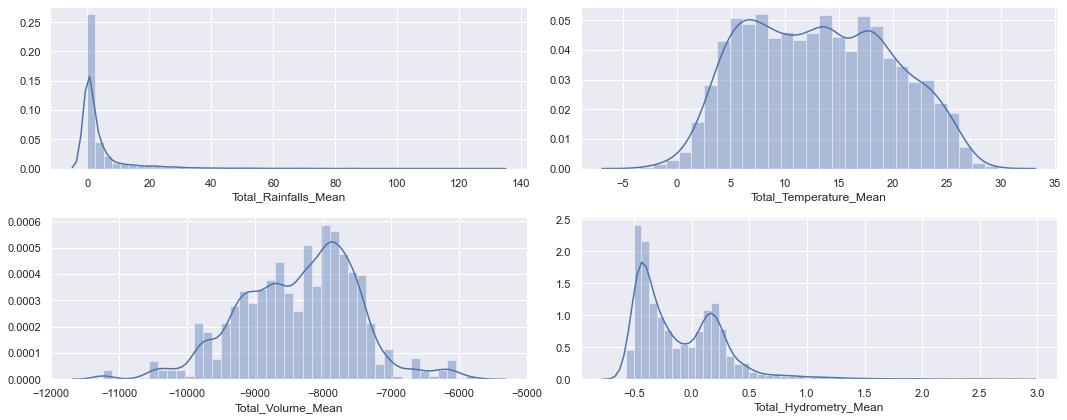

In [16]:
#feature distributions
f, axs = plt.subplots(2, 2, figsize=(15, 6))
sns.distplot(auser['Total_Rainfalls_Mean'], ax=axs[0,0])
sns.distplot(auser['Total_Temperature_Mean'], ax=axs[0,1])
sns.distplot(auser['Total_Volume_Mean'], ax=axs[1,0])
sns.distplot(auser['Total_Hydrometry_Mean'], ax=axs[1,1])
f.tight_layout()

Let's look how features changed yearly

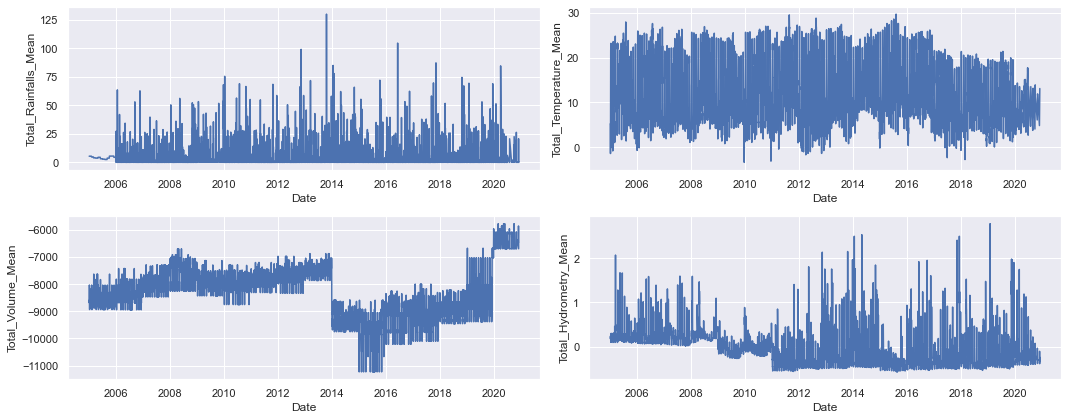

In [17]:
#relationship between date and features
f, axs = plt.subplots(2, 2, figsize=(15, 6))
sns.lineplot(data=auser, x="Date", y="Total_Rainfalls_Mean", ax=axs[0,0])
sns.lineplot(data=auser, x="Date", y="Total_Temperature_Mean", ax=axs[0,1])
sns.lineplot(data=auser, x="Date", y="Total_Volume_Mean",ax=axs[1,0])
sns.lineplot(data=auser, x="Date", y="Total_Hydrometry_Mean", ax=axs[1,1])
f.tight_layout()

Let's look how groundwaters changed yearly

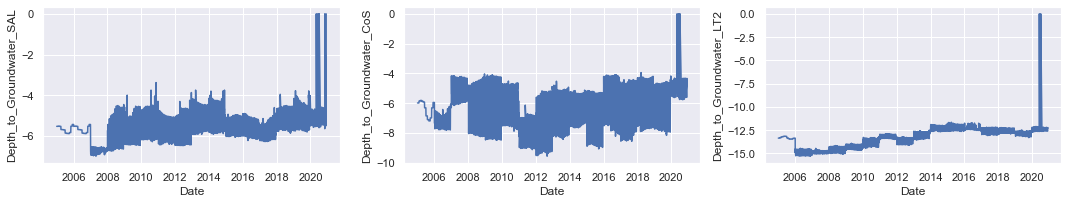

In [18]:
#relationship between date and groundwaters
f, axs = plt.subplots(1, 3, figsize=(15, 3))
sns.lineplot(data=auser, x="Date", y="Depth_to_Groundwater_SAL", ax=axs[0])
sns.lineplot(data=auser, x="Date", y="Depth_to_Groundwater_CoS", ax=axs[1])
sns.lineplot(data=auser, x="Date", y="Depth_to_Groundwater_LT2", ax=axs[2])
f.tight_layout()

Let's look how groundwaters correlated with features

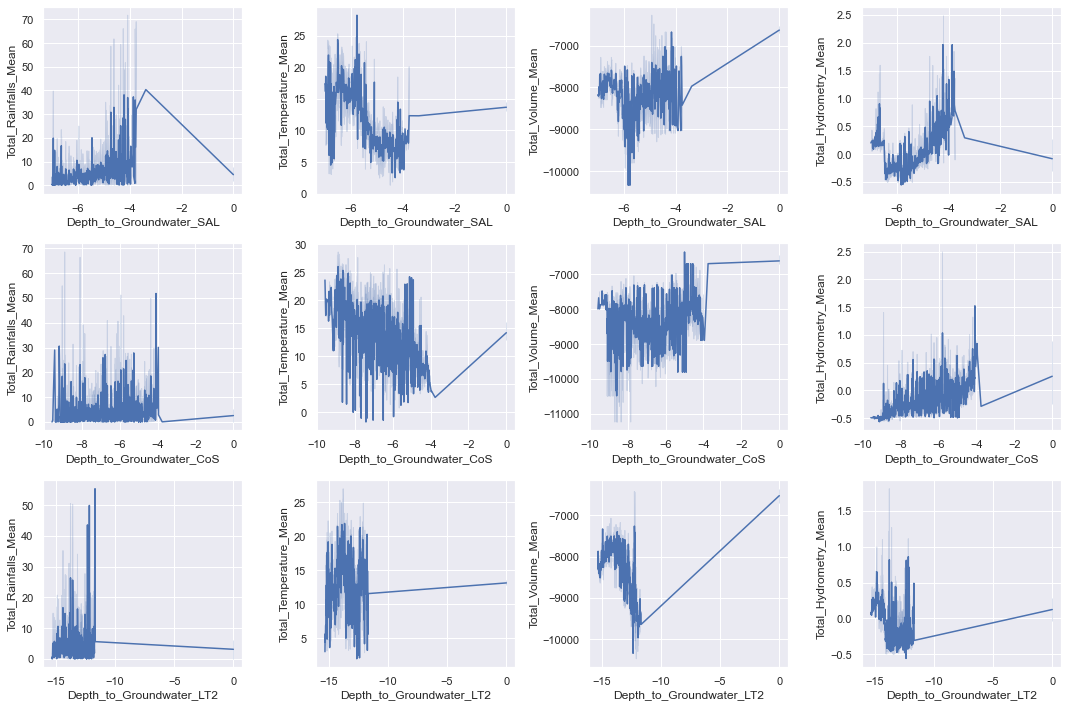

In [19]:
#relationship between groundwaters and features
f, axs = plt.subplots(3, 4, figsize=(15, 10))

#Depth_to_Groundwater_SAL
sns.lineplot(data=auser, x="Depth_to_Groundwater_SAL", y="Total_Rainfalls_Mean", dashes=False, ax=axs[0,0])
sns.lineplot(data=auser, x="Depth_to_Groundwater_SAL", y="Total_Temperature_Mean", dashes=False, ax=axs[0,1])
sns.lineplot(data=auser, x="Depth_to_Groundwater_SAL", y="Total_Volume_Mean", dashes=False, ax=axs[0,2])
sns.lineplot(data=auser, x="Depth_to_Groundwater_SAL", y="Total_Hydrometry_Mean", dashes=False, ax=axs[0,3])

#Depth_to_Groundwater_CoS
sns.lineplot(data=auser, x="Depth_to_Groundwater_CoS", y="Total_Rainfalls_Mean", dashes=False, ax=axs[1,0])
sns.lineplot(data=auser, x="Depth_to_Groundwater_CoS", y="Total_Temperature_Mean", dashes=False, ax=axs[1,1])
sns.lineplot(data=auser, x="Depth_to_Groundwater_CoS", y="Total_Volume_Mean", dashes=False, ax=axs[1,2])
sns.lineplot(data=auser, x="Depth_to_Groundwater_CoS", y="Total_Hydrometry_Mean", dashes=False, ax=axs[1,3])

#Depth_to_Groundwater_LT2
sns.lineplot(data=auser, x="Depth_to_Groundwater_LT2", y="Total_Rainfalls_Mean", dashes=False, ax=axs[2,0])
sns.lineplot(data=auser, x="Depth_to_Groundwater_LT2", y="Total_Temperature_Mean", dashes=False, ax=axs[2,1])
sns.lineplot(data=auser, x="Depth_to_Groundwater_LT2", y="Total_Volume_Mean", dashes=False, ax=axs[2,2])
sns.lineplot(data=auser, x="Depth_to_Groundwater_LT2", y="Total_Hydrometry_Mean", dashes=False, ax=axs[2,3])
f.tight_layout()

2020 year shows badly results for groundwater, extremaly falling down.

In [20]:
def feature_correlation_visual(df, columns, scaler = False):
    temp_data = pd.DataFrame(df, columns = columns).set_index([columns[0]])
    
    if scaler == True:
        scaler = StandardScaler()
        temp_data[columns[1]] =  scaler.fit_transform(temp_data[[columns[1]]])
        
    plt.figure(figsize=(20, 7))
    sns.lineplot(data=temp_data, dashes=False)
    plt.title('Correlation between {} and Groundwaters'.format(columns[1]), fontdict = {'fontsize': 16, 'verticalalignment': 'bottom'})
    plt.legend(columns, loc='lower left');

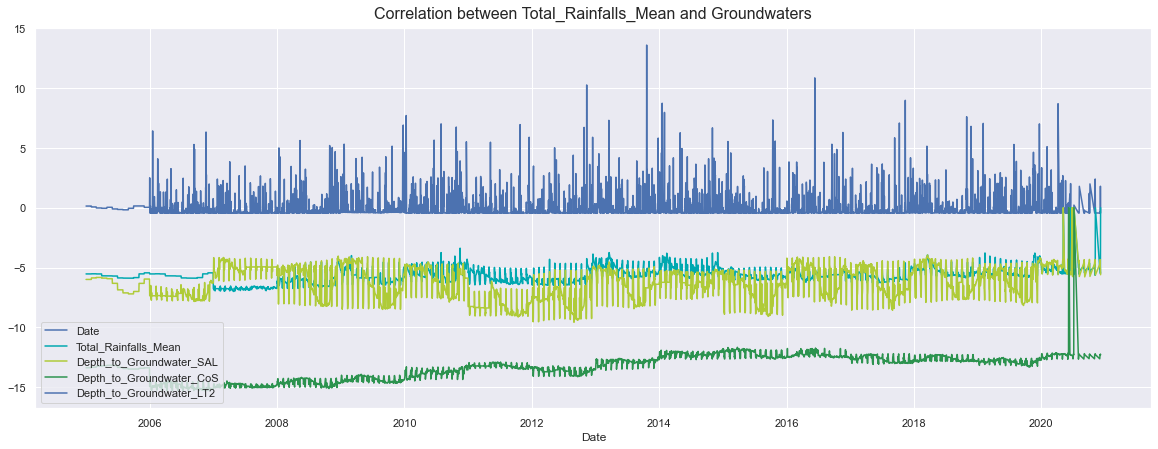

In [21]:
#relationship between Rainfalls and groundwaters
feature_correlation_visual(auser, ['Date', 'Total_Rainfalls_Mean', 'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_CoS','Depth_to_Groundwater_LT2'], scaler=True)

Correlation between rainfalls and groundwaters is expressed, there is some similar peak, but this correlation is delayed in time, that's ok, rains don't get to groundwaters at once. 

Also, it looks like SAl and COS have correlation, that's ok as it both Northern groundwater aquifer, and Lt2 is Southern.

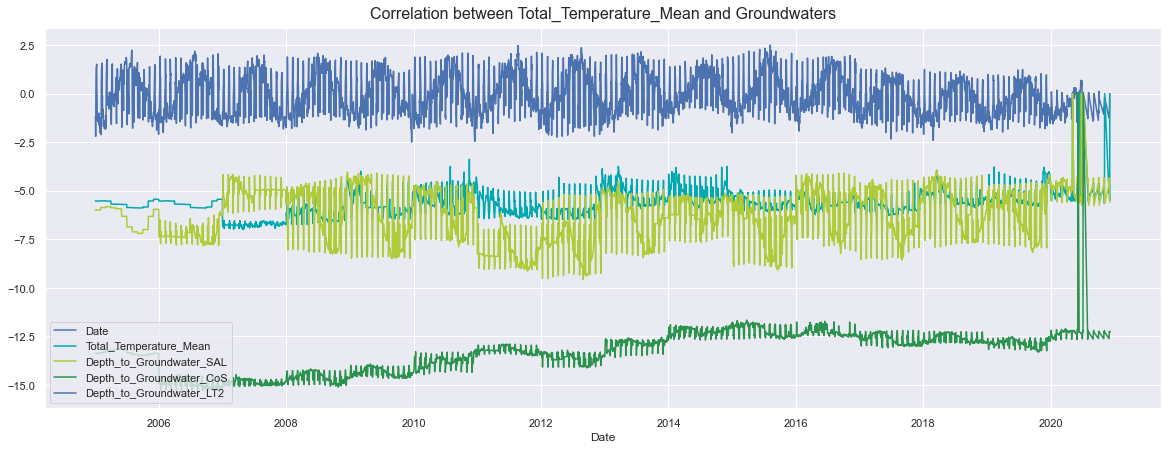

In [22]:
#relationship between Temperature and groundwaters
feature_correlation_visual(auser, ['Date', 'Total_Temperature_Mean', 'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_CoS','Depth_to_Groundwater_LT2'], scaler=True)

Again there is correlation with delay in time.

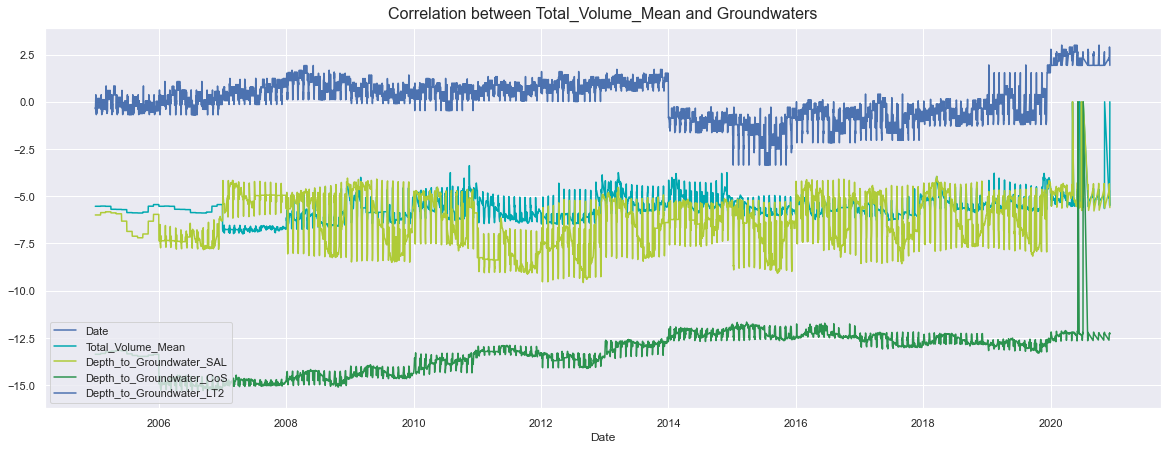

In [23]:
#relationship between Volume and groundwaters
feature_correlation_visual(auser, ['Date', 'Total_Volume_Mean', 'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_CoS','Depth_to_Groundwater_LT2'], scaler=True)

I am highly interested in data from 2020, what could influence on the water so much?

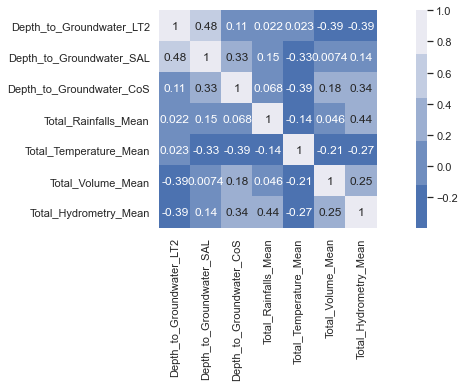

In [24]:
plt.figure(figsize=(14, 4))
sns.heatmap(auser.corr(), cbar=True, annot=True, square=True, annot_kws={'size': 12}, 
            cmap=["#4C72B0", "#708EBF", "#9CAFD1", "#C3CDE2", "#EAEAF2"])
plt.show()

Heatmap doesn't show any good correlation between veriables.  I still think there are higher correlation between rainfalls and graundwaters. Because the reinfalls is the only resources for groundwaters. 

## Doganella

The wells field Doganella is fed by two underground aquifers not fed by rivers or lakes but fed by meteoric infiltration. The upper aquifer is a water table with a thickness of about 30m. The lower aquifer is a semi-confined artesian aquifer with a thickness of 50m and is located inside lavas and tufa products. These aquifers are accessed through wells called Well 1, ..., Well 9. Approximately 80% of the drainage volumes come from the artesian aquifer. The aquifer levels are influenced by the following parameters: rainfall, humidity, subsoil, temperatures and drainage volumes.

**Predict**: Depth_to_Groundwater_Pozzo_1, ..., Depth_to_Groundwater_Pozzo_9

In [25]:
doganella = pd.read_csv('Aquifer_Doganella.csv',  parse_dates = [0])
print(doganella.shape)
doganella.head()

(6026, 22)


,Date,Rainfall_Monteporzio,Rainfall_Velletri,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_2,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Depth_to_Groundwater_Pozzo_5,Depth_to_Groundwater_Pozzo_6,Depth_to_Groundwater_Pozzo_7,...,Volume_Pozzo_1,Volume_Pozzo_2,Volume_Pozzo_3,Volume_Pozzo_4,Volume_Pozzo_5+6,Volume_Pozzo_7,Volume_Pozzo_8,Volume_Pozzo_9,Temperature_Monteporzio,Temperature_Velletri
0,2004-01-01,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.30,8.60
1,2004-02-01,0.2,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.70,6.25
2,2004-03-01,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.40,9.80
3,2004-04-01,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.35,5.95
4,2004-05-01,0.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.60,5.85


In [26]:
doganella.describe()

,Rainfall_Monteporzio,Rainfall_Velletri,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_2,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Depth_to_Groundwater_Pozzo_5,Depth_to_Groundwater_Pozzo_6,Depth_to_Groundwater_Pozzo_7,Depth_to_Groundwater_Pozzo_8,...,Volume_Pozzo_1,Volume_Pozzo_2,Volume_Pozzo_3,Volume_Pozzo_4,Volume_Pozzo_5+6,Volume_Pozzo_7,Volume_Pozzo_8,Volume_Pozzo_9,Temperature_Monteporzio,Temperature_Velletri
count,5399.000000,5374.000000,2537.000000,2736.000000,2774.000000,2374.000000,2508.000000,2428.000000,2311.000000,2551.000000,...,1356.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,4564.000000,4383.000000
mean,2.893758,3.159732,-36.929137,-94.746188,-111.638928,-98.223934,-102.552596,-91.672955,-95.819225,-95.845370,...,1529.376211,3433.485746,3208.114931,3527.627374,7178.560713,2491.400685,3660.482101,3239.807765,13.458457,15.574038
std,8.624455,8.913341,10.179111,3.891286,3.809581,2.391763,3.711563,2.216446,1.686417,2.523905,...,1154.952073,772.564645,1084.939228,700.013152,1607.944298,671.378069,813.007457,730.314145,6.763101,6.352674
min,0.000000,0.000000,-59.500000,-112.500000,-117.800000,-108.660000,-109.890000,-99.480000,-97.430000,-107.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.620000,-0.270000
25%,0.000000,0.000000,-45.250000,-98.460000,-115.077500,-100.500000,-104.450000,-92.947500,-97.350000,-97.840000,...,484.695000,3521.215000,2730.862500,3596.372500,7272.557500,2282.235000,3795.562500,3110.930000,8.085000,10.365000
50%,0.000000,0.000000,-34.900000,-93.280000,-111.805000,-97.970000,-101.815000,-91.500000,-96.570000,-95.320000,...,1408.860000,3591.810000,3215.880000,3667.210000,7854.750000,2677.160000,3894.375000,3378.455000,13.050000,15.150000
75%,0.600000,0.600000,-28.510000,-91.290000,-108.030000,-96.050000,-99.867500,-90.027500,-94.020000,-93.595000,...,2546.995000,3845.600000,3734.505000,3864.400000,7999.130000,2917.105000,3988.800000,3466.797500,18.992500,20.725000
max,112.600000,106.600000,-20.310000,-89.670000,-100.590000,-94.000000,-96.220000,-88.600000,-91.640000,-92.470000,...,4171.280000,4030.270000,5378.800000,4076.100000,8360.210000,3427.420000,4341.710000,4336.780000,30.400000,31.900000


In [27]:
missing_data(doganella)

,Total Missing,Percent
Volume_Pozzo_1,4670,77.497511
Volume_Pozzo_5+6,4666,77.431132
Volume_Pozzo_9,4666,77.431132
Volume_Pozzo_4,4666,77.431132
Volume_Pozzo_3,4666,77.431132
Volume_Pozzo_2,4666,77.431132
Volume_Pozzo_8,4666,77.431132
Volume_Pozzo_7,4666,77.431132
Depth_to_Groundwater_Pozzo_7,3715,61.649519
Depth_to_Groundwater_Pozzo_9,3687,61.184866


In [28]:
missing_data_rows(doganella)

,Total Missing,Percent
985,21,95.454545
986,21,95.454545
987,21,95.454545
984,21,95.454545
946,19,86.363636
...,...,...
5620,0,0.000000
5619,0,0.000000
5618,0,0.000000
5617,0,0.000000


In [29]:
doganella = remove_empty_rows(doganella)

deleted_rows : 3100


In [30]:
doganella = fillna_monthly(doganella)

C:\Users\Mira\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  import sys
C:\Users\Mira\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  # This is added back by InteractiveShellApp.init_path()


In [31]:
combine_columns(doganella)

,Date,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_2,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Depth_to_Groundwater_Pozzo_5,Depth_to_Groundwater_Pozzo_6,Depth_to_Groundwater_Pozzo_7,Depth_to_Groundwater_Pozzo_8,Depth_to_Groundwater_Pozzo_9,Total_Rainfalls_Mean,Total_Temperature_Mean,Total_Volume_Mean
3074,2012-01-06,-53.45,-92.17,-106.970,-96.50,-98.99,-89.25,-92.95,-93.83,-95.54,0.0,18.750,3625.307517
3075,2012-02-06,-53.58,-92.18,-107.030,-96.50,-98.99,-89.25,-92.95,-93.83,-95.55,0.0,19.550,3627.178251
3076,2012-03-06,-53.72,-92.19,-106.990,-96.51,-99.00,-89.25,-92.95,-93.84,-95.57,0.0,20.180,3586.351588
3077,2012-04-06,-53.72,-92.21,-106.990,-96.52,-99.00,-89.27,-92.96,-93.85,-95.57,7.0,17.325,3613.036370
3078,2012-05-06,-53.72,-92.24,-106.990,-96.53,-99.00,-89.28,-92.97,-93.86,-95.57,0.0,18.505,3624.089640
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6021,2020-06-26,-50.32,-100.35,-100.880,-101.49,-104.31,-97.94,-96.59,-97.74,-90.62,0.0,22.220,3723.763500
6022,2020-06-27,-50.32,-100.56,-100.840,-101.59,-104.30,-97.96,-96.44,-97.78,-90.54,0.0,23.310,3717.000000
6023,2020-06-28,-50.32,-100.56,-100.920,-101.59,-104.30,-98.46,-96.44,-97.78,-90.54,0.0,24.245,3794.652000
6024,2020-06-29,-50.32,-100.56,-101.190,-101.59,-104.30,-98.46,-96.10,-97.78,-90.83,0.0,23.125,3672.067500


In [32]:
doganella.columns

Index(['Date', 'Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_2',
       'Depth_to_Groundwater_Pozzo_3', 'Depth_to_Groundwater_Pozzo_4',
       'Depth_to_Groundwater_Pozzo_5', 'Depth_to_Groundwater_Pozzo_6',
       'Depth_to_Groundwater_Pozzo_7', 'Depth_to_Groundwater_Pozzo_8',
       'Depth_to_Groundwater_Pozzo_9', 'Total_Rainfalls_Mean',
       'Total_Temperature_Mean', 'Total_Volume_Mean'],
      dtype='object')

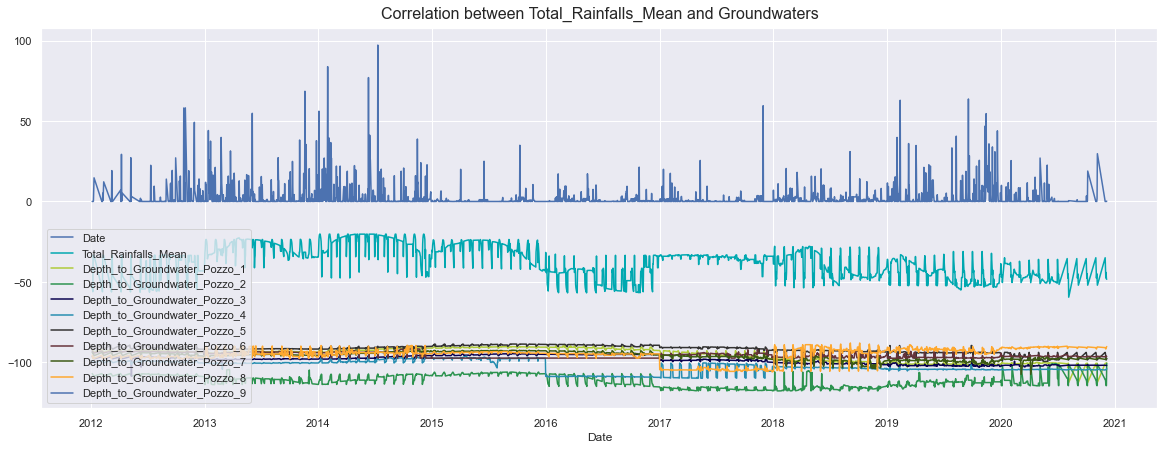

In [33]:
#relationship between Rainfalls and groundwaters
feature_correlation_visual(doganella, ['Date', 'Total_Rainfalls_Mean', 'Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_2',
       'Depth_to_Groundwater_Pozzo_3', 'Depth_to_Groundwater_Pozzo_4',
       'Depth_to_Groundwater_Pozzo_5', 'Depth_to_Groundwater_Pozzo_6',
       'Depth_to_Groundwater_Pozzo_7', 'Depth_to_Groundwater_Pozzo_8',
       'Depth_to_Groundwater_Pozzo_9'], scaler=False)

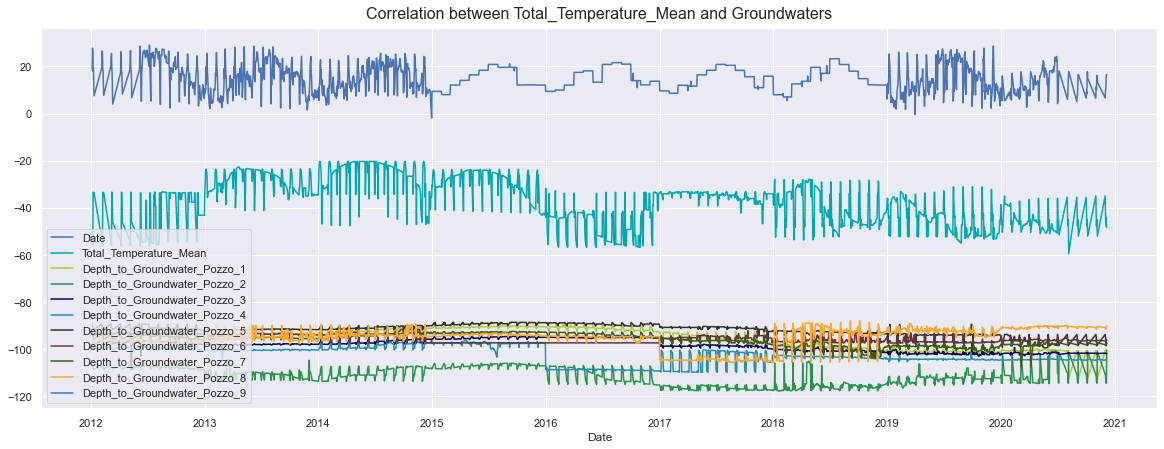

In [34]:
#relationship between Temperature and groundwaters
feature_correlation_visual(doganella, ['Date', 'Total_Temperature_Mean', 'Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_2',
       'Depth_to_Groundwater_Pozzo_3', 'Depth_to_Groundwater_Pozzo_4',
       'Depth_to_Groundwater_Pozzo_5', 'Depth_to_Groundwater_Pozzo_6',
       'Depth_to_Groundwater_Pozzo_7', 'Depth_to_Groundwater_Pozzo_8',
       'Depth_to_Groundwater_Pozzo_9'], scaler=False)

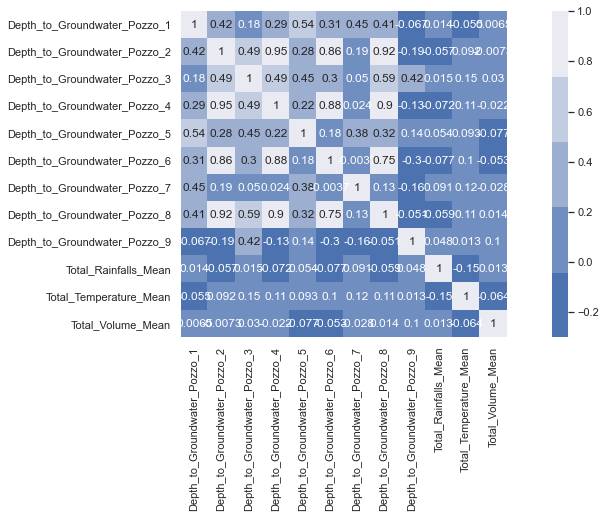

In [35]:
plt.figure(figsize=(16, 6))
sns.heatmap(doganella.corr(), cbar=True, annot=True, square=True, annot_kws={'size': 12}, 
            cmap=["#4C72B0", "#708EBF", "#9CAFD1", "#C3CDE2", "#EAEAF2"])
plt.show()

## Luco

The Luco wells field is fed by an underground aquifer. This aquifer not fed by rivers or lakes but by meteoric infiltration at the extremes of the impermeable sedimentary layers. Such aquifer is accessed through wells called Well 1, Well 3 and Well 4 and is influenced by the following parameters: rainfall, depth to groundwater, temperature and drainage volumes.

**Predict**: Depth_to_Groundwater_Podere_Casetta

In [36]:
luco = pd.read_csv('Aquifer_Luco.csv', parse_dates = [0])
print(luco.shape)
luco.head()

(7487, 22)


,Date,Rainfall_Simignano,Rainfall_Siena_Poggio_al_Vento,Rainfall_Mensano,Rainfall_Montalcinello,Rainfall_Monticiano_la_Pineta,Rainfall_Sovicille,Rainfall_Ponte_Orgia,Rainfall_Scorgiano,Rainfall_Pentolina,...,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Temperature_Siena_Poggio_al_Vento,Temperature_Mensano,Temperature_Pentolina,Temperature_Monteroni_Arbia_Biena,Volume_Pozzo_1,Volume_Pozzo_3,Volume_Pozzo_4
0,2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,5.50,0.80,NaN,NaN,NaN
1,2000-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,6.20,3.25,NaN,NaN,NaN
2,2000-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,7.25,0.95,NaN,NaN,NaN
3,2000-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,7.00,4.20,NaN,NaN,NaN
4,2000-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,7.90,6.55,NaN,NaN,NaN


In [37]:
luco.describe()

,Rainfall_Simignano,Rainfall_Siena_Poggio_al_Vento,Rainfall_Mensano,Rainfall_Montalcinello,Rainfall_Monticiano_la_Pineta,Rainfall_Sovicille,Rainfall_Ponte_Orgia,Rainfall_Scorgiano,Rainfall_Pentolina,Rainfall_Monteroni_Arbia_Biena,...,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Temperature_Siena_Poggio_al_Vento,Temperature_Mensano,Temperature_Pentolina,Temperature_Monteroni_Arbia_Biena,Volume_Pozzo_1,Volume_Pozzo_3,Volume_Pozzo_4
count,6822.00000,951.000000,1722.000000,6525.000000,2205.000000,6657.000000,1260.000000,3036.000000,2116.000000,3104.000000,...,1012.000000,920.000000,969.000000,7487.000000,7487.000000,7487.000000,7487.000000,2008.000000,2008.000000,2008.000000
mean,2.52146,2.269821,2.560743,2.477579,3.105850,2.281959,2.366825,3.222134,8.734783,2.391108,...,-11.100692,-9.892256,-13.098520,1.903954,3.343248,13.419761,13.593736,-160.684377,-147.773134,-135.214663
std,7.09014,6.039464,10.279711,7.488022,9.496626,7.053183,6.813364,21.307151,52.149236,7.602140,...,0.836808,0.667793,2.571084,5.602519,6.923075,7.249467,7.199626,51.220771,55.643788,56.818120
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-12.600000,-11.900000,-19.000000,-3.550000,-5.250000,-4.800000,-3.900000,-295.375015,-261.849600,-237.336612
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-11.600000,-10.300000,-13.000000,0.000000,0.000000,7.950000,7.950000,-198.758660,-189.343442,-175.177124
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-11.200000,-9.800000,-12.700000,0.000000,0.000000,13.200000,13.700000,-163.545061,-148.874123,-145.845891
75%,0.60000,1.200000,0.600000,0.600000,0.800000,0.400000,0.600000,0.800000,1.200000,0.600000,...,-10.600000,-9.400000,-11.400000,0.000000,0.000000,19.350000,19.650000,-119.615001,-110.467100,-96.849815
max,87.80000,79.200000,313.000000,134.600000,171.000000,194.200000,90.000000,794.200000,620.800000,137.600000,...,-2.800000,-8.200000,0.000000,31.800000,31.850000,31.300000,29.450000,-55.433467,0.000000,-0.053438


In [38]:
missing_data(luco)

,Total Missing,Percent
Depth_to_Groundwater_Pozzo_3,6567,87.712034
Rainfall_Siena_Poggio_al_Vento,6536,87.297983
Depth_to_Groundwater_Pozzo_4,6518,87.057566
Depth_to_Groundwater_Pozzo_1,6475,86.483238
Rainfall_Ponte_Orgia,6227,83.170829
Rainfall_Mensano,5765,77.000134
Volume_Pozzo_4,5479,73.180179
Volume_Pozzo_3,5479,73.180179
Volume_Pozzo_1,5479,73.180179
Rainfall_Pentolina,5371,71.737679


In [39]:
luco.drop(['Depth_to_Groundwater_Pozzo_3', 'Depth_to_Groundwater_Pozzo_4', 'Depth_to_Groundwater_Pozzo_1',
          'Rainfall_Siena_Poggio_al_Vento', 'Rainfall_Ponte_Orgia', 'Rainfall_Mensano', 'Volume_Pozzo_4',
          'Volume_Pozzo_3', 'Volume_Pozzo_1'], axis = 1, inplace = True)

In [40]:
missing_data_rows(luco)

,Total Missing,Percent
0,8,61.538462
317,8,61.538462
242,8,61.538462
312,8,61.538462
313,8,61.538462
...,...,...
6664,0,0.000000
6663,0,0.000000
6662,0,0.000000
6661,0,0.000000


In [41]:
luco = remove_empty_rows(luco)

deleted_rows : 0


In [42]:
luco = fillna_monthly(luco)

C:\Users\Mira\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  import sys
C:\Users\Mira\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  # This is added back by InteractiveShellApp.init_path()


In [43]:
combine_columns(luco)
luco.drop('Total_Volume_Mean', axis = 1, inplace = True)

In [44]:
luco

,Date,Depth_to_Groundwater_Podere_Casetta,Total_Rainfalls_Mean,Total_Temperature_Mean
0,2000-01-01,-7.301258,7.166830,1.5750
1,2000-02-01,-7.181737,4.737844,2.3625
2,2000-03-01,-7.040191,2.903871,2.0500
3,2000-04-01,-7.002715,2.164456,2.8000
4,2000-05-01,-6.969828,3.427223,3.6125
...,...,...,...,...
7482,2020-06-26,-7.007880,0.000000,22.2875
7483,2020-06-27,-7.007880,0.000000,22.6250
7484,2020-06-28,-7.007880,0.000000,23.5375
7485,2020-06-29,-7.007880,0.000000,23.0000


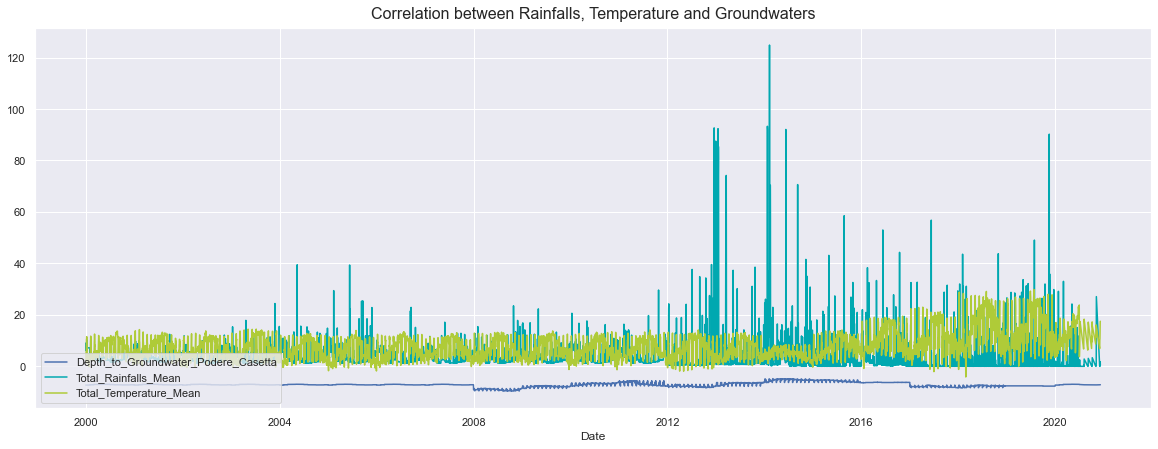

In [45]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=luco.set_index('Date'), dashes=False)
plt.title('Correlation between Rainfalls, Temperature and Groundwaters', fontdict = {'fontsize': 16, 'verticalalignment': 'bottom'})
plt.legend(luco.columns[1:], loc='lower left');

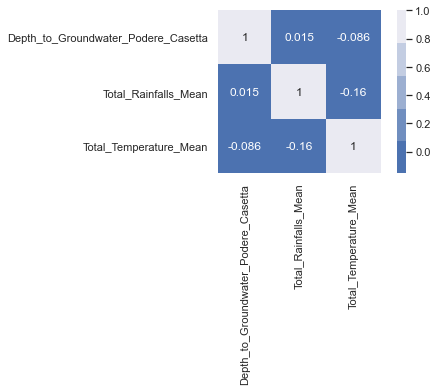

In [46]:
plt.figure(figsize=(6, 3))
sns.heatmap(luco.corr(), cbar=True, annot=True, square=True, annot_kws={'size': 12}, 
            cmap=["#4C72B0", "#708EBF", "#9CAFD1", "#C3CDE2", "#EAEAF2"])
plt.show()

## Petrignano

The wells field of the alluvial plain between Ospedalicchio di Bastia Umbra and Petrignano is fed by three underground aquifers separated by low permeability septa. The aquifer can be considered a water table groundwater and is also fed by the Chiascio river. The groundwater levels are influenced by the following parameters: rainfall, depth to groundwater, temperatures and drainage volumes, level of the Chiascio river.

**Predict**: Depth_to_Groundwater_Pozzo_P24, Depth_to_Groundwater_Pozzo_P25

In [47]:
petrignano = pd.read_csv('Aquifer_Petrignano.csv', parse_dates = [0])
print(petrignano.shape)
petrignano.head()

(5223, 8)


,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,2006-03-14,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,2006-03-15,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,2006-03-16,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,2006-03-17,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,2006-03-18,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [48]:
petrignano.describe()

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
count,4199.000000,5168.000000,5184.000000,4199.000000,4199.000000,5025.000000,4199.000000
mean,1.556633,-26.263723,-25.692926,15.030293,13.739081,-29043.296726,2.372517
std,5.217923,3.319858,3.214165,7.794871,7.701369,4751.864371,0.589088
min,0.000000,-34.470000,-33.710000,-3.700000,-4.200000,-45544.896000,0.000000
25%,0.000000,-28.250000,-27.620000,8.800000,7.700000,-31678.560000,2.100000
50%,0.000000,-25.990000,-25.540000,14.700000,13.500000,-28689.120000,2.400000
75%,0.100000,-23.820000,-23.430000,21.400000,20.000000,-26218.080000,2.700000
max,67.300000,-19.660000,-19.100000,33.000000,31.100000,0.000000,4.100000


In [49]:
missing_data(petrignano)

,Total Missing,Percent
Rainfall_Bastia_Umbra,1024,19.605591
Temperature_Bastia_Umbra,1024,19.605591
Temperature_Petrignano,1024,19.605591
Hydrometry_Fiume_Chiascio_Petrignano,1024,19.605591
Volume_C10_Petrignano,198,3.790925
Depth_to_Groundwater_P24,55,1.053035
Depth_to_Groundwater_P25,39,0.746697
Date,0,0.000000


In [50]:
missing_data_rows(petrignano)

,Total Missing,Percent
796,6,75.0
804,6,75.0
803,6,75.0
802,6,75.0
801,6,75.0
...,...,...
2421,0,0.0
2422,0,0.0
2423,0,0.0
2424,0,0.0


In [51]:
petrignano = remove_empty_rows(petrignano)

deleted_rows : 11


In [52]:
petrignano = fillna_monthly(petrignano)

C:\Users\Mira\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  import sys
C:\Users\Mira\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  # This is added back by InteractiveShellApp.init_path()


In [53]:
combine_columns(petrignano)

,Date,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Total_Rainfalls_Mean,Total_Temperature_Mean,Total_Volume_Mean,Total_Hydrometry_Mean
0,2006-03-14,-22.48,-22.18,1.402732,12.228279,-32850.144,2.565847
1,2006-03-15,-22.38,-22.14,1.402732,12.228279,-32850.144,2.565847
2,2006-03-16,-22.25,-22.04,1.402732,12.228279,-32850.144,2.565847
3,2006-03-17,-22.38,-22.04,1.402732,12.228279,-32850.144,2.565847
4,2006-03-18,-22.60,-22.04,1.402732,12.228279,-32850.144,2.565847
...,...,...,...,...,...,...,...
5218,2020-06-26,-25.68,-25.07,0.000000,25.100000,-29930.688,2.500000
5219,2020-06-27,-25.80,-25.11,0.000000,25.600000,-31332.960,2.400000
5220,2020-06-28,-25.80,-25.19,0.000000,26.300000,-32120.928,2.400000
5221,2020-06-29,-25.78,-25.18,0.000000,26.450000,-30602.880,2.400000


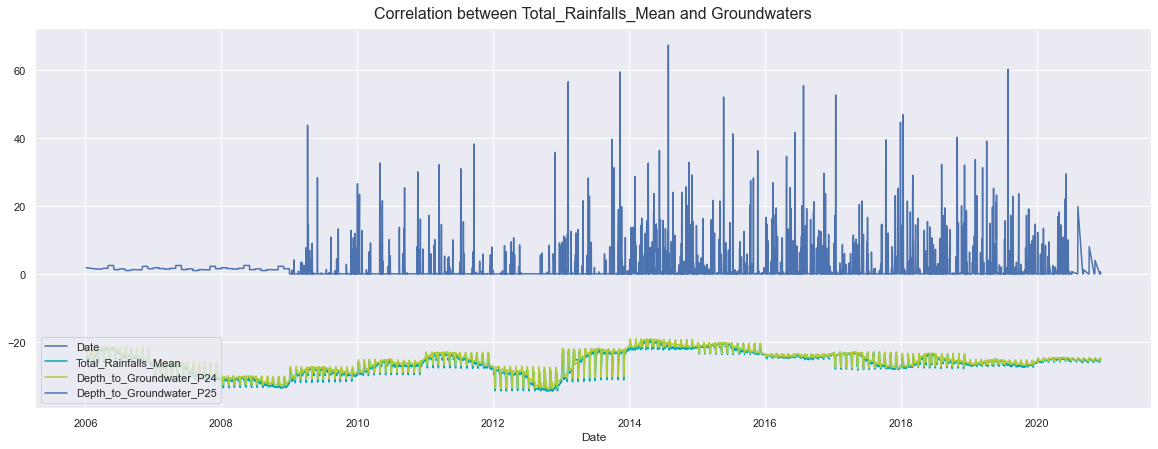

In [54]:
#relationship between Rainfalls and groundwaters
feature_correlation_visual(petrignano, ['Date', 'Total_Rainfalls_Mean', 'Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25'])

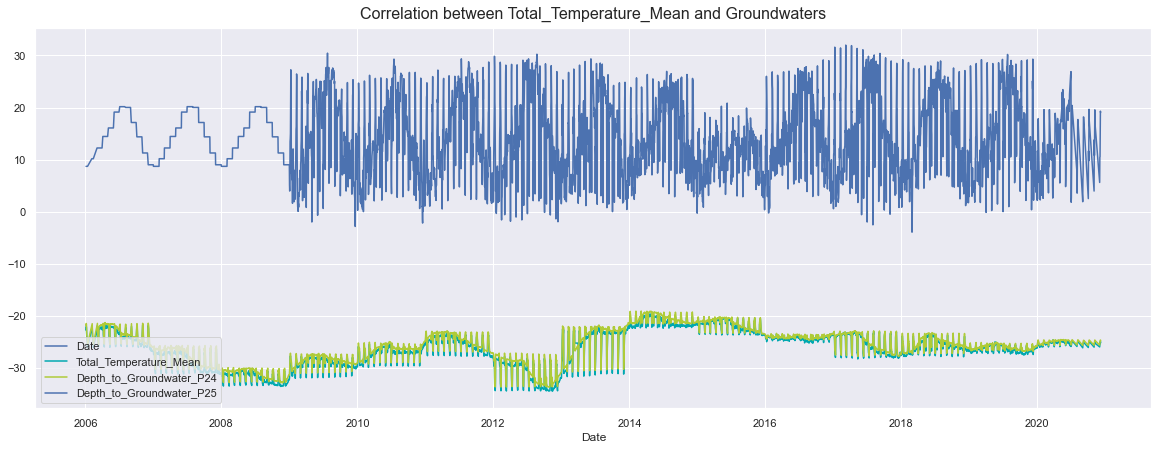

In [55]:
#relationship between Temperature and groundwaters
feature_correlation_visual(petrignano, ['Date', 'Total_Temperature_Mean', 'Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25'])

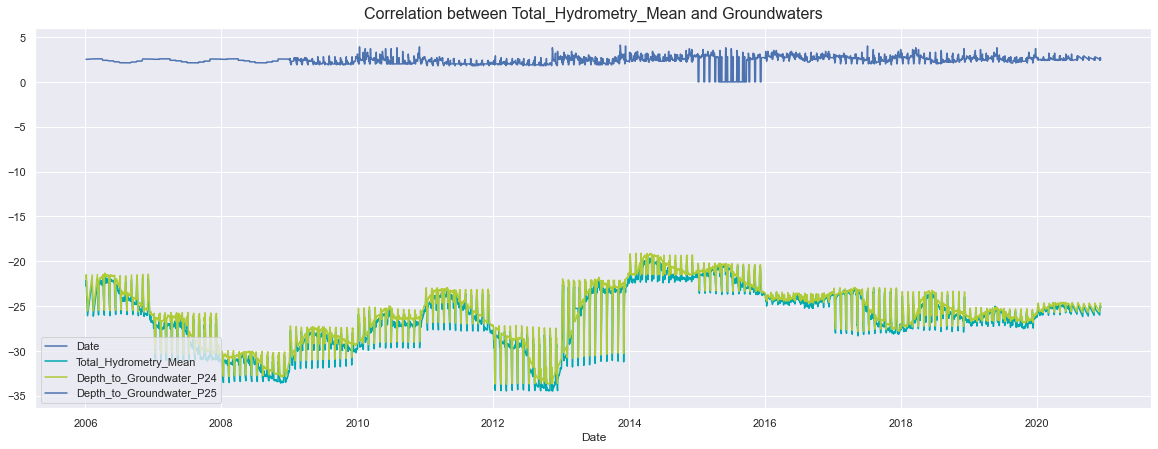

In [56]:
#relationship between Hydrometry and groundwaters
feature_correlation_visual(petrignano, ['Date', 'Total_Hydrometry_Mean', 'Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25'])

## Aquifers Summerize

Let's have fun and look what is going on with rainfalls and tempterature over years in Italy

In [57]:
aquifers = pd.merge(auser[['Date','Total_Rainfalls_Mean', 'Total_Temperature_Mean']], 
                    doganella[['Date','Total_Rainfalls_Mean', 'Total_Temperature_Mean']], on='Date', how='left')\
            .merge(luco[['Date','Total_Rainfalls_Mean', 'Total_Temperature_Mean']], on='Date', how='left')\
            .merge(petrignano[['Date','Total_Rainfalls_Mean', 'Total_Temperature_Mean']], on='Date', how='left')

combine_columns(aquifers)

,Date,Total_Rainfalls_Mean,Total_Temperature_Mean,Total_Volume_Mean
0,2005-01-01,5.460924,3.468750,NaN
1,2005-02-01,4.146111,3.231250,NaN
2,2005-03-01,3.026373,3.981250,NaN
3,2005-04-01,2.450922,3.812500,NaN
4,2005-05-01,3.535577,4.543750,NaN
...,...,...,...,...
5655,2020-06-26,0.000000,21.633125,NaN
5656,2020-06-27,0.000000,22.211875,NaN
5657,2020-06-28,0.000000,22.914375,NaN
5658,2020-06-29,0.000000,22.200000,NaN


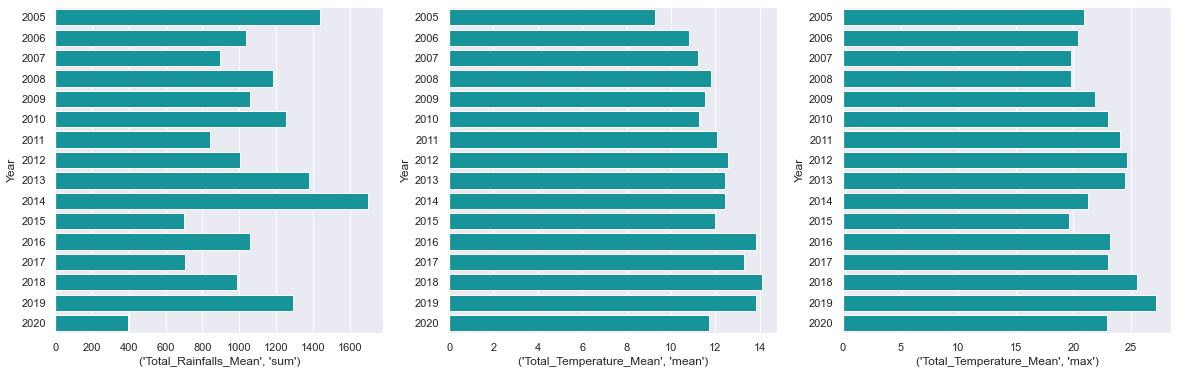

In [58]:
aquifers['Year'] = aquifers.loc[:, 'Date'].dt.year
temp = aquifers.groupby('Year')[['Total_Rainfalls_Mean', 'Total_Temperature_Mean']]\
                            .agg({'Total_Rainfalls_Mean': sum, 'Total_Temperature_Mean':['mean', 'max']}).reset_index()

f, axs = plt.subplots(1, 3, figsize=(20, 6))
sns.barplot(x=temp['Total_Rainfalls_Mean','sum'], y=temp['Year'], orient='h', color='#00A8B0', ax=axs[0])
sns.barplot(x=temp['Total_Temperature_Mean','mean'], y=temp['Year'], orient='h', color='#00A8B0', ax=axs[1])
sns.barplot(x=temp['Total_Temperature_Mean','max'], y=temp['Year'], orient='h', color='#00A8B0', ax=axs[2]);

The level of rains in 2020 was much smaller then in previous years, however temperature incresed not so high and I can not see trand on this data.

# Model